In [1]:
import itertools
def window(seq, n=2):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(itertools.islice(it, n))
    if len(result) == n:
        yield result    
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [2]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Huber loss function
def huber(x, a, b, c):
    return np.where(x <= c, a * x + b - a * c, (a + b) / 2 * (x - c) + a * c - b)

# Generate some sample data
x_data = np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
y_data = np.array([1.2, 1.5, 2.0, 3.2, 5.0, 6.5, 7.8])

# Fit the curve to the data
popt, pcov = curve_fit(huber, x_data, y_data)
perr = np.sqrt(np.diag(pcov))

# Print the optimized parameters
print('Optimized parameters:', popt)

# Evaluate the curve at the x-coordinates of the data points
y_fit = huber(x_data, *popt)

# Print the aligned values
print('Aligned values:', y_fit)


Optimized parameters: [4.74922507 0.88854925 0.10000001]
Aligned values: [0.88854921 0.71392814 2.12337172 3.5328153  4.94225888 6.35170246
 7.76114604]


In [3]:
def count_kmers(read, k):
    """Count kmer occurrences in a given read.

    Parameters
    ----------
    read : string
        A single DNA sequence.
    k : int
        The value of k for which to count kmers.

    Returns
    -------
    counts : dictionary, {'string': int}
        A dictionary of counts keyed by their individual kmers (strings
        of length k).

    Examples
    --------
    >>> count_kmers("GATGAT", 3)
    {'ATG': 1, 'GAT': 2, 'TGA': 1}
    """
    # Start with an empty dictionary
    counts = {}
    nucleotides = ['A', 'T', 'G', 'C']
    # Add the kmer to the dictionary if it's not there
    for i in itertools.product(nucleotides, repeat=k):
        counts["".join(i)] = 0
    # Calculate how many kmers of length k there are
    num_kmers = len(read) - k + 1
    # Loop over the kmer start positions
    for kmer in window(read, n=k):
        kmer = "".join(kmer)
        if kmer not in counts:
            continue
        # Increment the count for this kmer
        counts[kmer] += 1
    # Return the final counts
    return counts

In [4]:
def represent(l2, e):
    result = []
    for l in l2:
        #print(sorted(count_kmers(l, 1).items(), key= lamda x: x[1]))
        s = sorted(count_kmers(l, 1).items(), key=lambda x: x[1])
        result.append(s[-1][0])
        if abs(s[-1][1] - s[-2][1]) < e :
            result.append(s[-2][0])
            if abs(s[-2][1] - s[-3][1]) < e:
                result.append(s[-3][0])
                if abs(s[-3][1] - s[-4][1]) < e:
                    result.append(s[-4][0])
    return result

def dict2array(d):
    return list(d.values())

In [5]:
def sort_function(origin, idx_sorted, v):
    try:
        return [origin[int(i)] for i in idx_sorted].index(v)
    except ValueError:
        return 9999999

In [6]:
def repeat_density(W, data, solution):
    repeat_data = {}
    with open("rm.pos", "r") as f:
        for line in f:
            if line.strip().split("\t")[0] not in repeat_data: repeat_data[line.strip().split("\t")[0]] = []
            repeat_data[line.strip().split("\t")[0]].append(line.strip().split("\t")[1])
            
    result = {}
    for k, v in repeat_data.items():
        hist, bins = np.histogram(v, range(0, len(data[k]), W))
        #print(hist)
        result[k] = hist
    
    return dict(sorted(result.items(), key=lambda x: sort_function(list(result.items()), solution, x)))

In [7]:
from Bio.SeqUtils import GC

def get_gc(W, data):
    result = {}
    for k, v in data.items():
        gc = []
        for w in range(0, len(v), W):
            gc.append(GC(v[w:w+W]))
        result[k] = gc
    
    return result

In [8]:
def get_convex(criterion, points, up=True):
    l = []
    for point in points:
        l.append(point >= criterion)
    if up:
        current_count = 0
        max_count = 0

        for val in l:
            if val:
                current_count += 1
                if current_count > max_count:
                    max_count = current_count
            else:
                current_count = 0
    else:
        current_count = 0
        max_count = 0

        for val in l:
            if not val:
                current_count += 1
                if current_count > max_count:
                    max_count = current_count
            else:
                current_count = 0
    return max_count / len(l)

In [9]:
get_convex(2, [1.3, 1.4, 1.5, 1.6, 4,0, 3.5, 1, 1.2, 1, 0.3], False)

0.36363636363636365

In [10]:
def crossEntropyError(y, t):
    delta = 1e-7 #아주 작은 값 (y가 0인 경우 -inf 값을 예방)
    return -np.sum(t*np.log(y+delta))

In [11]:
count_kmers("AATCGC", 2)

{'AA': 1,
 'AT': 1,
 'AG': 0,
 'AC': 0,
 'TA': 0,
 'TT': 0,
 'TG': 0,
 'TC': 1,
 'GA': 0,
 'GT': 0,
 'GG': 0,
 'GC': 1,
 'CA': 0,
 'CT': 0,
 'CG': 1,
 'CC': 0}

# RUN

In [12]:
import Bio.SeqIO as SeqIO
from tqdm import tqdm
import itertools 
import random

data = {}

with open("./At1_shuffle.fna", "r") as f:
    for record in tqdm(SeqIO.parse(f, "fasta")):
        data[record.id] = record.seq

60it [00:00, 1250.23it/s]


0.007908002933920117
0.007923002933920117
0.007909669600586785
0.007916336267253452
0.007908002933920117
0.007903002933920118
0.007923002933920117
0.007899669600586783
0.007923002933920117
0.007918002933920117
0.00790133626725345
0.007923002933920117
0.00790133626725345
0.007918002933920117
0.007909669600586785
0.007909669600586785
0.007923002933920117
0.007899669600586783
0.007923002933920117
0.007923002933920117
0.007914669600586784
0.007923002933920117
0.00794133626725345
0.007918002933920117
0.007914669600586784
0.00790133626725345
0.007923002933920117
0.007914669600586784
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007918002933920117
0.007914669600586784
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007918002933920117
0.007923002933920117
0.007923002933920117
0.007923002933920117
0.007916336267253452
0.007903002933920118
0.007923002933920117
0.007923002933920117
0.007903002933920

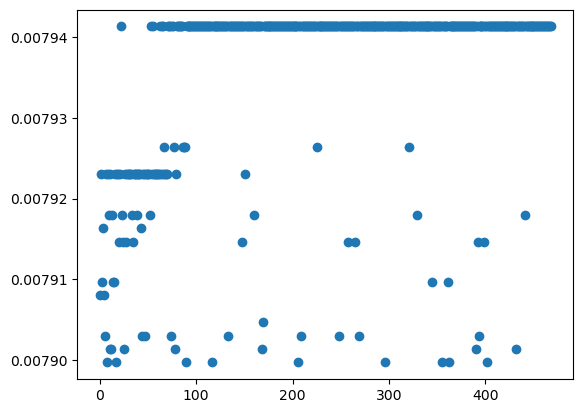

In [15]:
import pandas as pd
import numpy as np
import pygad
import scipy
import math
import matplotlib.pyplot as plt

xs = list(data.values())
ctg_names = list(data.keys())
locations = list(zip(xs, ctg_names))
loss = []
def fitness_func(solution, solution_idx):
    #print(solution, solution_idx)
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    # output = numpy.sum(solution*function_inputs)
    # fitness = 
    #print(sorted(data.keys(), key=lambda x: sort_function(list(data.keys()), solution, x)))
    W = 100
    repeat = repeat_density(W, data, solution)
    gc = get_gc(W, dict(sorted(data.items(), key=lambda x: sort_function(list(data.items()), solution, x))))
    repeat_concat = np.asarray(list(itertools.chain.from_iterable(repeat.values())))
    gc_concat = np.asarray(list(itertools.chain.from_iterable(gc.values())))
    
        
    #c_repeat = sum(repeat_concat) / len(repeat_concat)
    #counterpoint_repeat = get_counterpoints(c_repeat, repeat_concat)
    #c_gc = sum(gc_concat) / len(gc_concat)
    #counterpoint_gc = get_counterpoints(c_gc, gc_concat)
    #print(counterpoint_repeat, counterpoint_gc)
    #score = math.sqrt((c_repeat - 2)**2 + (c_gc - 2)**2)
    #print(score)
    
    #score1 = np.sqrt(np.sum((repeat_concat.cumsum() - np.tanh(range(0, len(repeat_concat))) + 1)**2))
    #score2 = np.sqrt(np.sum((gc_concat.cumsum() - np.tanh([-x for x in range(0, len(gc_concat))]) + 1)**2))
    #score1 = crossEntropyError(repeat_concat.cumsum(), sum(repeat_concat)*(np.tanh(range(0, len(repeat_concat))) + 1))
    #score2 = crossEntropyError(gc_concat.cumsum(), sum(gc_concat)*(np.tanh([-x for x in range(0, len(gc_concat))]) + 1))
    #print(repeat_concat)
    score1 = get_convex(np.quantile(repeat_concat, 0.75), repeat_concat, True)
    score2 = get_convex(np.quantile(gc_concat, 0.75), gc_concat, False)
    print((score1 + score2) / 2)
    loss.append((score1 + score2) / 2)
    return (score1 + score2) / 2

fitness_function = fitness_func
num_generations = 50 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 10 # Number of solutions in the population.
num_genes = len(data)

init_range_low = 1
init_range_high = 12

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 2 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 

last_fitness = 0
population_list=[]
gene_space = [i for i in range(len(data))]

for i in range(sol_per_pop):
    nxm_random_num=list(np.random.permutation(gene_space)) 
    population_list.append(nxm_random_num) # add to the population_list
    
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       initial_population=population_list,
                       num_genes=num_genes,

                       gene_space = gene_space, #  
                    #    init_range_low=init_range_low,
                    #    init_range_high=init_range_high,

                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       mutation_num_genes = 1
                       )
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution = sorted(data.keys(), key=lambda x: sort_function(list(data.keys()), solution, x)))) 

plt.scatter(x=range(len(loss)), y=loss)
#ga_instance.plot_fitness()
#best_solution: [ 3  4 12 10  6  9  2 10 12 10  6  9] 
#**Is any way to get new gerneration that elements not duplication**

In [ ]:
import pygad
import numpy
import pywt

def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    M = 30
    cwtmatr, freqs = pywt.cwt(np.asarray(sorted(raw_spec.values(), key=lambda x: sort_function(list(raw_spec.values()), solution, x))), list(range(1, M)), 'cmor4-1.0')
    fitness = np.absolute(cwtmatr).mean()
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(raw_spec)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.run()
loaded_ga_instance.plot_result()
solution, solution_fitness, solution_idx = loaded_ga_instance.best_solution()
solution

In [121]:
import pandas as pd
import numpy as np
import pygad
import scipy
import math
import matplotlib.pyplot as plt

xs = list(data.values())
ctg_names = list(data.keys())
locations = list(zip(xs, ctg_names))
loss = []
def fitness_func(solution, solution_idx):
    # Define the Huber loss function
    def huber(x, a, b, c):
        return np.where(x <= c, a * x + b - a * c, (a + b) / 2 * (x - c) + a * c - b)

    # Generate some sample data
    x_data = range(
    y_data = np.array([1.2, 1.5, 2.0, 3.2, 5.0, 6.5, 7.8])

    # Fit the curve to the data
    popt, pcov = curve_fit(huber, x_data, y_data)
    perr = np.sqrt(np.diag(pcov))

    # Print the optimized parameters
    print('Optimized parameters:', popt)

    # Evaluate the curve at the x-coordinates of the data points
    y_fit = huber(x_data, *popt)

    # Print the aligned values
    print('Aligned values:', y_fit)
    return (score1 + score2) / 2

fitness_function = fitness_func
num_generations = 5 # Number of generations.
num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(data)  

init_range_low = 1
init_range_high = 12

parent_selection_type = "rank" # Type of parent selection.
keep_parents = 2 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "swap" # Type of the mutation operator.
mutation_percent_genes = 10 

last_fitness = 0
population_list=[]
gene_space = [i for i in range(len(data))]

for i in range(sol_per_pop):
    nxm_random_num=list(np.random.permutation(gene_space)) 
    population_list.append(nxm_random_num) # add to the population_list
    
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       initial_population=population_list,
                       num_genes=num_genes,

                       gene_space = gene_space, #  
                    #    init_range_low=init_range_low,
                    #    init_range_high=init_range_high,

                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       mutation_num_genes = 1
                       )
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution = sorted(data.keys(), key=lambda x: sort_function(list(data.keys()), solution, x)))) 

plt.scatter(x=range(len(loss)), y=loss)
#ga_instance.plot_fitness()
#best_solution: [ 3  4 12 10  6  9  2 10 12 10  6  9] 
#**Is any way to get new gerneration that elements not duplication**

SyntaxError: '(' was never closed (1684278011.py, line 18)

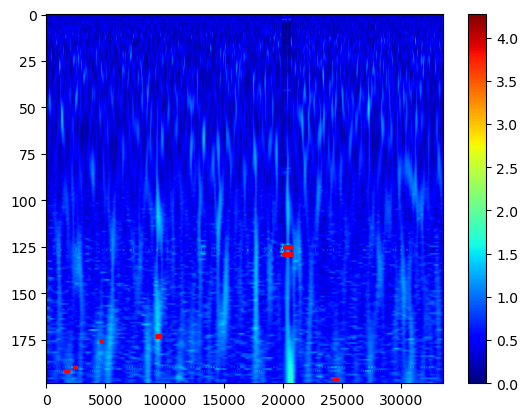

0.5001396743340186


In [300]:
sorted_raw_spec = dict(sorted(raw_spec.items(), key=lambda x: sort_function(list(raw_spec.keys()), solution, x[0])))
cwtmatr, freqs = pywt.cwt(np.asarray(list(itertools.chain.from_iterable(sorted_raw_spec.values()))), list(range(1, M)), 'cmor4-1.0')
rows, cols = np.where(ab > np.quantile(ab, .9999))
#print(len(rows), len(cols))
plt.scatter(x=cols, y=rows, marker='x', c='red', s=5)
plt.imshow(ab,  cmap='jet', aspect='auto',vmax=ab.max(), vmin=0) 
#plt.plot(np.angle(raw_spec[1+start:D+start])/1.0)
#plt.plot([1+start:100+start])
plt.colorbar()
plt.show() 
print(np.median(ab))

# heuristic

In [ ]:
def heuristic():
    ma = 0
    for i in tqdm(range(1000)):
        random.seed(i)
        random.shuffle(raw_spec)
        cwtmatr, freqs = pywt.cwt(raw_spec[1+start:D+start], list(range(1, 50)), 'cmor4-1.0')
        if ma < np.absolute(np.max(cwtmatr)):
            ma = np.absolute(np.max(cwtmatr))
            best = cwtmatr
    plt.imshow(np.absolute(best),  cmap='jet', aspect='auto',vmax=np.absolute(best).max(), vmin=0) 
    plt.colorbar()
    plt.show()
heuristic()

# TMP

In [1292]:
from itertools import chain
from math import sqrt

def divisors(n, M):
    return sorted([x for x in chain.from_iterable((i,n//i) for i in range(1,int(sqrt(n))+1) if n%i == 0) if x < M])

1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [04:00<00:00, 415.81it/s]


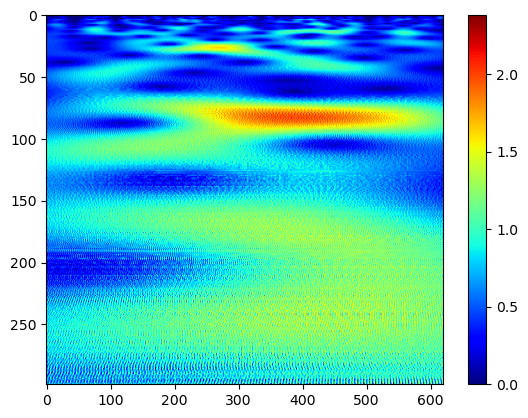

In [1325]:
from tqdm import tqdm
import sys
raw_spec = [change[som.winner(i)] for i in X]
raw_spec = np.array(raw_spec)

def E_step(matrix):
    return np.argmax(np.max(np.absolute(matrix), axis=0))

def M_step(matrix, M, i):
    try: 
        return np.argmax(np.absolute(matrix)[divisors(np.argmax(np.max(np.absolute(matrix), axis=0)), M)[-i-2]])
    except IndexError:
        return np.nan

def change_spec(spec, matrix, M, i):
    tmp = spec[E_step(matrix)]
    try:
        spec[E_step(matrix)] = spec[M_step(matrix, M, i)]
    except IndexError:
        return np.nan
    spec[M_step(matrix, M, i)] = tmp

def rendering(spec, M=50, start=1):
    D = len(spec)
    cwtmatr, freqs = pywt.cwt(spec[1+start:D+start], list(range(1, M)), 'cmor4-1.0')
    cnt = 0
    for i in tqdm(range(100000)):
        if change_spec(spec=spec, matrix=cwtmatr, M=M, i=i) == np.nan:
            break
        change_spec(spec=spec, matrix=cwtmatr, M=M, i=i)
        cnt +=1
    plt.imshow(np.absolute(cwtmatr),  cmap='jet', aspect='auto',vmax=np.absolute(cwtmatr).max(), vmin=0) 
    plt.colorbar()
    plt.show()
print(cnt)
rendering(raw_spec, M=300)

# Legacy

In [542]:
fft = np.fft.fft(raw_spec) / len(raw_spec)  
 
fft_magnitude = abs(fft)
shift = np.fft.fftshift(fft_magnitude)

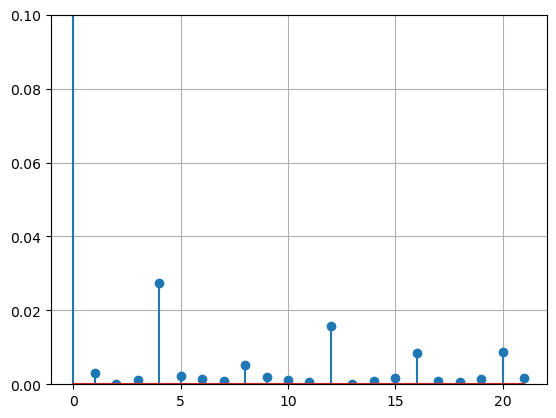

In [543]:
length = len(raw_spec)

fs = length
f = np.round(np.linspace(-(fs / 2), fs / 2, length)[int(length/2):int(length/2)+22])
 
plt.stem(f, shift[int(length/2):int(length/2)+22]) 

plt.ylim(0,0.1)
plt.grid()

plt.savefig("./ecolidouble.jpg")
plt.show()

In [544]:
print(sorted(shift, reverse=True)[:10])
print([i for i in list(map(lambda x: x - length // 2 + 1, reversed(np.argsort(shift)))) if i > 0][:10]) 
print([(length // i)*L for i in list(map(lambda x: x - length // 2 + 1, reversed(np.argsort(shift)))) if i > 0][:10]) 

[1.3169770679555541, 0.027487824973584894, 0.027487824973584887, 0.02348633662720106, 0.02348633662720105, 0.02272254001623008, 0.02272254001623008, 0.022171102117552972, 0.02217110211755297, 0.021893224402072118]
[1, 5, 209, 137, 237, 449, 169, 401, 413, 557]
[19034500, 3806900, 91000, 138900, 80300, 42300, 112600, 47400, 46000, 34100]


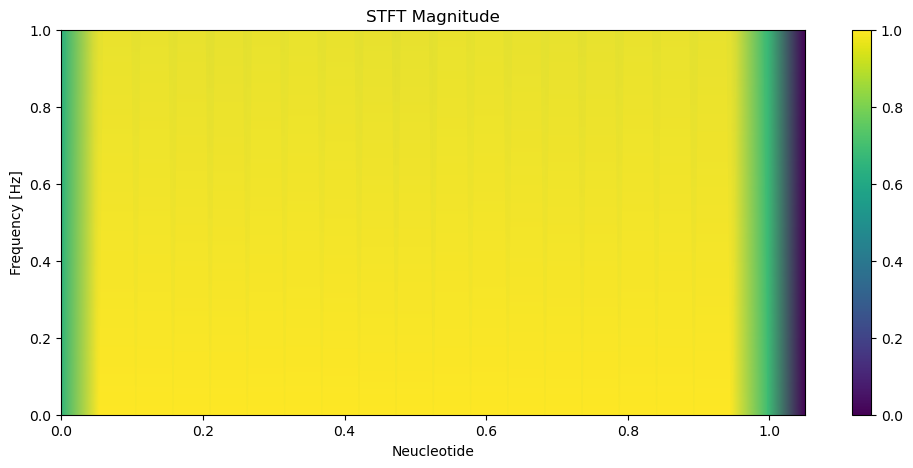

In [555]:
from scipy import signal

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.colorbar()
    plt.xlabel('Neucleotide'); plt.ylim([0, 1]); plt.show()

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(raw_spec, length, nperseg=nperseg)
    draw_stft(f, t, Zxx)

calc_stft(20000)

In [490]:
signal.stft(raw_spec, length, nperseg=100) # f, t, Zxx

(array([     0.  ,    951.72,   1903.44,   2855.16,   3806.88,   4758.6 ,
          5710.32,   6662.04,   7613.76,   8565.48,   9517.2 ,  10468.92,
         11420.64,  12372.36,  13324.08,  14275.8 ,  15227.52,  16179.24,
         17130.96,  18082.68,  19034.4 ,  19986.12,  20937.84,  21889.56,
         22841.28,  23793.  ,  24744.72,  25696.44,  26648.16,  27599.88,
         28551.6 ,  29503.32,  30455.04,  31406.76,  32358.48,  33310.2 ,
         34261.92,  35213.64,  36165.36,  37117.08,  38068.8 ,  39020.52,
         39972.24,  40923.96,  41875.68,  42827.4 ,  43779.12,  44730.84,
         45682.56,  46634.28, -47586.  , -46634.28, -45682.56, -44730.84,
        -43779.12, -42827.4 , -41875.68, -40923.96, -39972.24, -39020.52,
        -38068.8 , -37117.08, -36165.36, -35213.64, -34261.92, -33310.2 ,
        -32358.48, -31406.76, -30455.04, -29503.32, -28551.6 , -27599.88,
        -26648.16, -25696.44, -24744.72, -23793.  , -22841.28, -21889.56,
        -20937.84, -19986.12, -19034.4

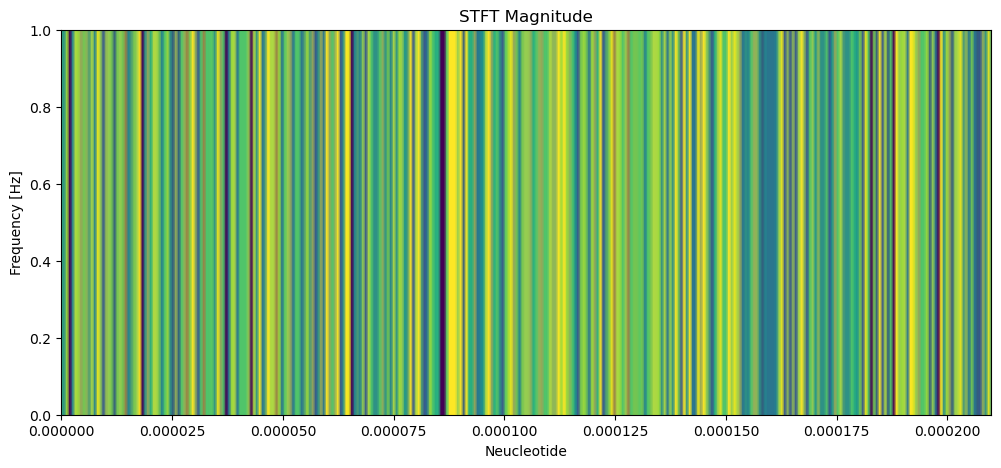

In [468]:
from scipy import signal

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Neucleotide'); plt.ylim([0, 1]); plt.show()

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(raw_spec[length//2-1000:length//2], length*L, nperseg=nperseg)
    draw_stft(f, t, Zxx)

calc_stft(5)

Frequency change point estimation

In [74]:
#print(kmer_datas[0])

# Transcriptome data

In [209]:
import pandas as pd

X = pd.read_csv("./RSEM.isoform.TMM.EXPR.matrix", sep="\t", index_col=0)

In [210]:
np.shape(X)

(51125, 36)

In [212]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (1, 2))
X = sc.fit_transform(X)

#som = Som(2, 1, 4**K, sigma=.001,learning_rate=0.5)
som = Som(3, 4, 36, sigma=.02, learning_rate=0.7)
som.random_weights_init(X)

som.train_random(X, 1000)
#som.train_batch(X, 1000)

In [213]:
som.distance_map().T

array([[0.021707  , 0.28235342, 0.74757947],
       [0.17484843, 0.49042698, 0.42712805],
       [0.23915455, 1.        , 0.27354045],
       [0.1664343 , 0.23432017, 0.16660569]])

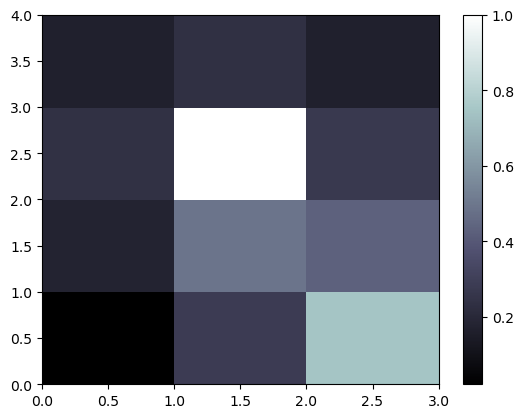

In [215]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
#y = [0, 0, 1, 1, 0]
for i, x in enumerate(X):
    w = som.winner(x)
    #print(w[0], end="\t")
    #plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

Os Vv Sl Nn Gm

In [77]:
data = load_digits()

In [25]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])